One of Accenture’s Managing Directors, Mae Mulligan, is the client lead for Social Buzz.

She has reviewed the brief provided by Social Buzz and has assembled a diverse team of Accenture experts to deliver the project.

Mae has scheduled a project kick off call with the internal Accenture project team for tomorrow morning.

Ahead of the call, Mae has shared the project brief so you can get up to speed on what Social Buzz need help with.

Read the brief to:

 - Understand the client and business problem at hand.
 - Identify the requirements that need to be delivered for this project.
 - Identify which tasks you should focus on as a Data Analyst.

## PROJECT BRIEF
### Client background:
Social Buzz was founded by two former engineers from a large social media conglomerate, one from London and the other from San Francisco. They left in 2008 and both met in San Francisco to start their business. They started Social Buzz because they saw an opportunity to
build on the foundation that their previous company started by creating a new platform where content took center stage. Social Buzz emphasizes content by keeping all users anonymous, only tracking user reactions on every piece of content. There are over 100 ways that users can
react to content, spanning beyond the traditional reactions of likes, dislikes, and comments. This ensures that trending content, as opposed to individual users, is at the forefront of user feeds. Over the past 5 years, Social Buzz has reached over 500 million active users each month.
They have scaled quicker than anticipated and need the help of an advisory firm to oversee their scaling process effectively.
Due to their rapid growth and digital nature of their core product, the amount of data that they create, collect and must analyze is huge. Every day over 100,000 pieces of content, ranging from text, images, videos and GIFs are posted. All of this data is highly unstructured and
requires extremely sophisticated and expensive technology to manage and maintain. Out of the 250 people working at Social Buzz, 200 of them are technical staff working on maintaining this highly complex technology. 

To start our engagement with Social Buzz, we are running a 3 month initial project in order
to prove to them that we are the best firm to work with. They are expecting the following:
- An audit of their big data practice
- Recommendations for a successful IPO
- An analysis of their content categories that highlights the top 5 categories with the largest aggregate popularity 

************************************************************

##### Import Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Import datasets

In [2]:
content = pd.read_csv('Content.csv')
reactions = pd.read_csv('Reactions.csv')
reaction_types = pd.read_csv('ReactionTypes.csv')

##### Check length of datasets

In [3]:
print(len(content))
print(len(reactions))
print(len(reaction_types))

1000
25553
16


##### Create a copy of dataset and check for missing values

In [4]:
cont = content.copy()
cont.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

##### Data Cleaning -  Subset columns (dropping column with NA - irrelevant)

In [5]:
cont = cont.iloc[:,[1,3,4]]
cont

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


##### Data Cleaning

In [6]:
cont.columns = cont.columns.str.lower()
cont.category = cont.category.str.lower()
cont.category = cont.category.str.strip('"')
cont = cont.rename(columns = {'content id':'content_id'})
cont

,content_id,type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


##### Create copy of dataset and check for missing values

In [7]:
react = reactions.copy()
react.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [8]:
react = react.iloc[:,[1,3,4]]

In [9]:
react.columns = react.columns.str.lower()

##### Checking for missing values

In [10]:
react.isna().sum()

content id      0
type          980
datetime        0
dtype: int64

##### Drop missing values

In [11]:
react = react.dropna()
react.isna().sum()

content id    0
type          0
datetime      0
dtype: int64

##### Data Cleaning

In [12]:
react.datetime = pd.to_datetime(react.datetime)

In [13]:
react.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   content id  24573 non-null  object        
 1   type        24573 non-null  object        
 2   datetime    24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 767.9+ KB


In [14]:
react = react.rename(columns = {'content id':'content_id'})

In [15]:
react

,content_id,type,datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


##### Create copy of dataset and check for missing values

In [16]:
react_type = reaction_types.copy()
react_type.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

##### Cleaning dataset

In [17]:
react_type.columns = react_type.columns.str.lower()

In [18]:
react_type = react_type.iloc[:,1:]

In [19]:
react_type

,type,sentiment,score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


##### Merge dataset

In [20]:
merge = pd.merge(react,react_type,left_on='type',right_on = 'type')

In [21]:
merge

,content_id,type,datetime,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,negative,0
...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,positive,72


##### Merge previously merged dataset

In [22]:
final_merge = pd.merge(cont,merge,left_on = 'content_id',right_on = 'content_id')

In [23]:
final_merge

,content_id,type_x,category,type_y,datetime,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2020-11-09 02:49:59,negative,10
...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,2021-04-09 08:05:56,positive,45
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,2021-02-16 17:17:02,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,2020-10-31 04:50:14,negative,12
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,2020-11-04 20:08:31,negative,12


##### Rename columns

In [24]:
final_merge.columns = ['content_id','media_type','category','type','datetime','sentiment','score']

In [25]:
final_merge

,content_id,media_type,category,type,datetime,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2020-11-09 02:49:59,negative,10
...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,2021-04-09 08:05:56,positive,45
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,intrigued,2021-02-16 17:17:02,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,2020-10-31 04:50:14,negative,12
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,technology,worried,2020-11-04 20:08:31,negative,12


##### Group data to find top 5 categories

In [26]:
final_merge1 = final_merge.groupby('category').sum('score').reset_index()

In [27]:
final_merge1.sort_values(by = 'score', ascending = False).head(5).to_csv('Top 5 Categories.csv')

In [28]:
final_merge1.sort_values(by = 'score', ascending = False).head(5)

,category,score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


<Axes: title={'center': 'Top 5 Categories'}, xlabel='category'>

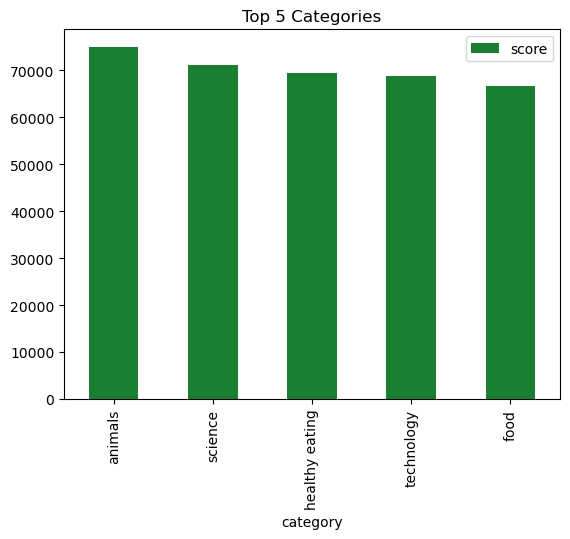

In [68]:
final_merge1.sort_values(by = 'score', ascending = False).head(5).plot(kind = 'bar', x = 'category', y = 'score', color = '#1A7F31', title = 'Top 5 Categories')

In [43]:
final_pie_plot = final_merge1.sort_values(by = 'score', ascending = False).head(5)

In [48]:
final_pie_plot

,category,score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


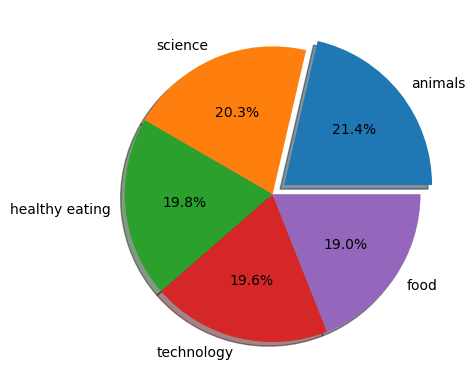

In [80]:
plt.pie(final_pie_plot.score,labels =final_pie_plot.category, explode = [0.1,0,0,0,0] ,autopct = '%1.1f%%',shadow = True)
plt.show()

<Axes: title={'center': 'Top  5 Media Types by Score'}, xlabel='media_type'>

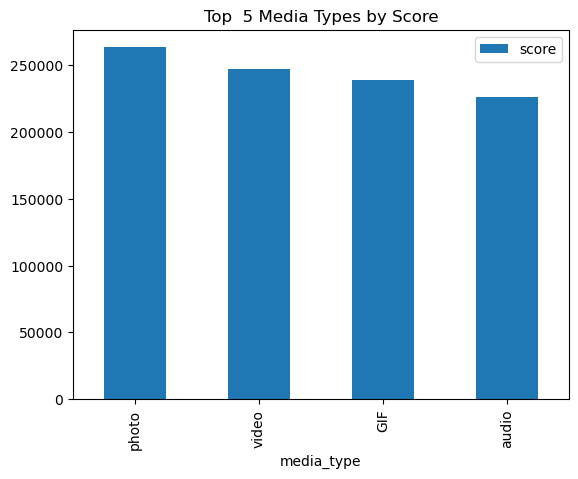

In [83]:
final_merge.groupby('media_type').sum('score').reset_index().sort_values(by = 'score', ascending = False).plot(kind = 'bar', x = 'media_type', y = 'score', title = 'Top  5 Media Types by Score')

<Axes: title={'center': 'Top 5 Reaction Types by Scores'}, xlabel='index'>

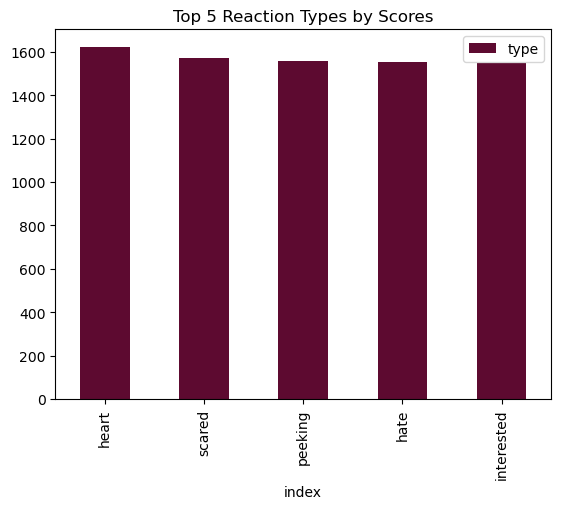

In [81]:
final_merge.type.value_counts().reset_index().sort_values(by = 'type', ascending = False).head(5).plot(kind = 'bar', x = 'index', y = 'type', color = '#5D0A30', title = 'Top 5 Reaction Types by Scores')